In [38]:
import json, os, requests
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from io import BytesIO

In [39]:
subscription_key = "******************"
face_api_url = "https://facerecognitionmna25f.cognitiveservices.azure.com/" + '/face/v1.0/detect'

In [40]:
def enlarge_bounding_box(face_rectangle, image_width, image_height, enlargement_factor=1.2):
    left = max(0, face_rectangle.left - (face_rectangle.width * (enlargement_factor - 1) / 2))
    top = max(0, face_rectangle.top - (face_rectangle.height * (enlargement_factor - 1) / 2))
    width = min(image_width - left, face_rectangle.width * enlargement_factor)
    height = min(image_height - top, face_rectangle.height * enlargement_factor)
    return {'left': int(left), 'top': int(top), 'width': int(width), 'height': int(height)}

def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        return img.width, img.height

In [41]:
def DetectaCara(image_url):
  headers = {'Ocp-Apim-Subscription-Key': subscription_key}
  #
  #
  params = {
  'returnFaceId': 'false',
  'returnFaceLandmarks':'false'
  #'returnFaceAttributes' : 'age, gender headPose, smile, facialHair, glasses, emotion',
  }
  response = requests.post (face_api_url, params=params, headers=headers, json={"url": image_url})
  r = json.dumps(response.json())
  r1 = json.loads(r)
  return r1


In [61]:
def MuestraCaras(image_path, identified_faces):
    # Load the original image
    response = requests.get(image_path)
    if (response.status_code == 200):
      image = Image.open(BytesIO(response.content))
      #image = Image.open(image_path)
      draw = ImageDraw.Draw(image)

      # Load a font
      try:
          font = ImageFont.truetype("arial.ttf", 20)
      except IOError:
          font = ImageFont.load_default()

      if len(caras) == 0:
          print("No se han detectado rostros.")
          #return None
      else:
        print('Rostros detectados:' + str(len(caras)))
        for i,face in enumerate(identified_faces):
            bbox = face['faceRectangle']
            name = 'Persona ' + str(i)

            # Define the bounding box coordinates
            left = bbox['left']
            top = bbox['top']
            right = left + bbox['width']
            bottom = top + bbox['height']

            # Draw the bounding box
            draw.rectangle([(left, top), (right, bottom)], outline="green", width=2)

            # Calculate text size using textbbox
            text_bbox = draw.textbbox((0, 0), name, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]

            # Draw a rectangle behind the text
            draw.rectangle([(left, max(top - text_height - 4, 0)), (left + text_width + 4, top)], fill="grey")

            # Draw the person's name on top of the bounding box
            draw.text((left + 2, top - text_height - 2), name, fill="white", font=font)

        # Display the image with bounding boxes
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print('No se pudo leer la imagen. ' + str(response))

## Ejercicio 1

Rostros detectados:4


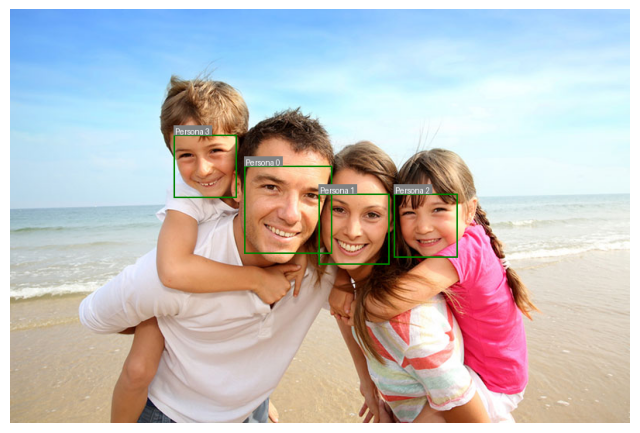

In [58]:
url_imagen = 'https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/Face/images/identification1.jpg'
caras = DetectaCara(url_imagen)
MuestraCaras(url_imagen,caras)

## Ejercicio 2

Rostros detectados:4


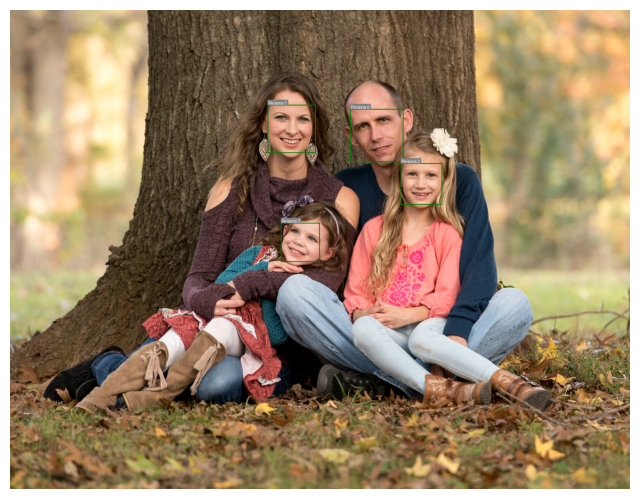

In [59]:
url_imagen = 'https://i0.wp.com/digital-photography-school.com/wp-content/uploads/2021/01/family-portrait-ideas-togetherness.jpg?fit=1500%2C1159&ssl=1'
caras = DetectaCara(url_imagen)
MuestraCaras(url_imagen,caras)

## Ejercicio 3

Rostros detectados:7


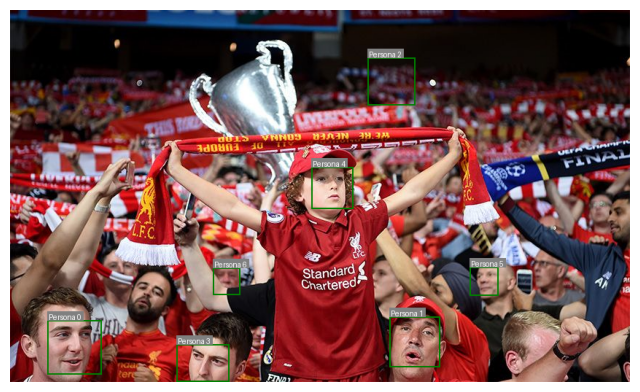

In [63]:
url_imagen = 'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/default/0001/66/thumb_65973_default_news_size_5.jpeg'
caras = DetectaCara(url_imagen)
MuestraCaras(url_imagen,caras)

## Ejercicio 4

Rostros detectados:8


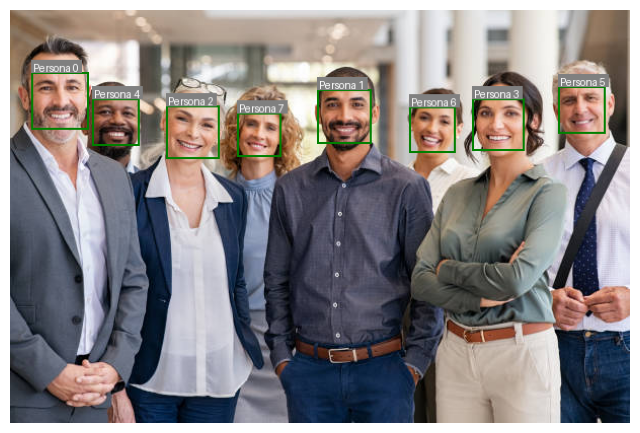

In [64]:
url_imagen = 'https://media.istockphoto.com/id/1346125184/photo/group-of-successful-multiethnic-business-team.jpg?s=612x612&w=0&k=20&c=5FHgRQZSZed536rHji6w8o5Hco9JVMRe8bpgTa69hE8='
caras = DetectaCara(url_imagen)
MuestraCaras(url_imagen,caras)

## Ejercicio 5

Rostros detectados:10


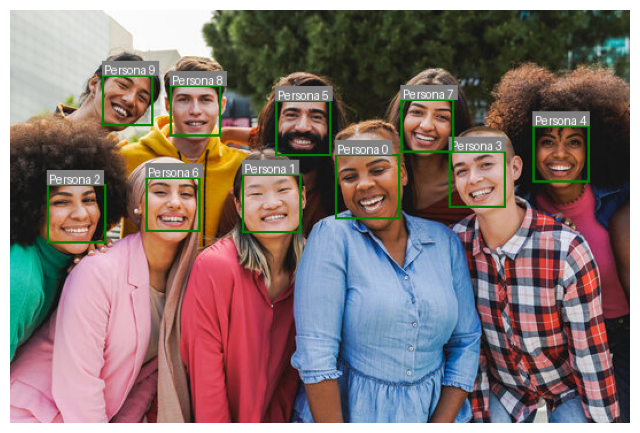

In [65]:
url_imagen = 'https://t4.ftcdn.net/jpg/05/06/75/11/360_F_506751155_fJ5Ko5T0wsTH7Q9VNwEgo6J81da8arlD.jpg'
caras = DetectaCara(url_imagen)
MuestraCaras(url_imagen,caras)